# CIFAR10 Classifier
- CIFAR10 classifier using a CNN

# Import necessary dependencies

In [0]:
import numpy as np

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

import matplotlib.pyplot as plt
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)
%matplotlib inline

# Constant parameters

In [0]:
n_classes = 10
input_shape = (32, 32, 3)
batch_size = 128
epochs = 10

# Load the dataset

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Dataset details

In [70]:
print('Dataset shape:',X_train.shape)
print('Train samples:',X_train.shape[0])
print('Test samples:',X_test.shape[0])

Dataset shape: (50000, 32, 32, 3)
Train samples: 50000
Test samples: 10000


## Visualize the data with unique labels

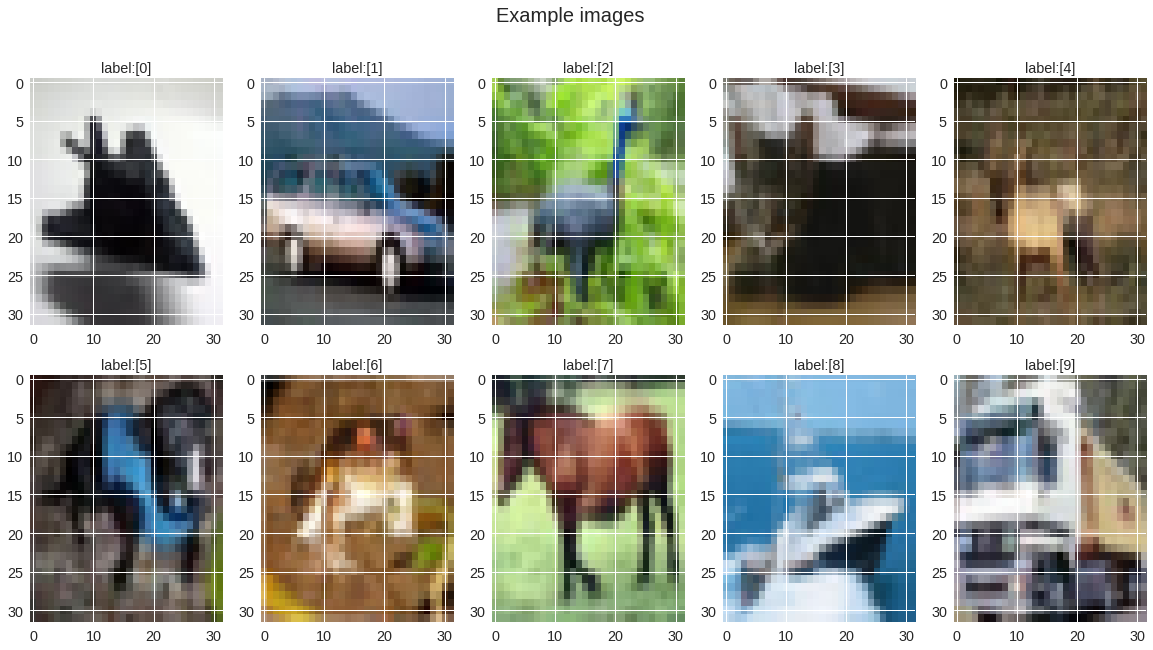

In [71]:
labels, idx = np.unique(ar=y_train,return_index=True)
X_train_sub = X_train[idx]
y_train_sub = y_train[idx]

fig, axes = plt.subplots(nrows=2,ncols=5,figsize=(20,10))

fig.suptitle('Example images',fontsize=20)

for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        curr_idx = (row*axes.shape[1]) + col
        axes[row][col].imshow(X_train_sub[curr_idx],aspect='auto')
        axes[row][col].set(title='label:{}'.format(y_train_sub[curr_idx]))

## One hot encode the labels

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes=n_classes)
y_test = keras.utils.to_categorical(y_test,num_classes=n_classes)

# Build the model 

In [0]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=input_shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=n_classes,activation='softmax'))

## Compile the model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# Train the model

In [82]:
model.fit(x=X_train,y=y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/10
50000/50000 [==============================] - 19s 377us/step - loss: 2.1142 - acc: 0.2553
Epoch 2/10
50000/50000 [==============================] - 17s 330us/step - loss: 1.6249 - acc: 0.4209
Epoch 3/10
50000/50000 [==============================] - 17s 333us/step - loss: 1.3991 - acc: 0.5068
Epoch 4/10
50000/50000 [==============================] - 17s 331us/step - loss: 1.2560 - acc: 0.5652
Epoch 5/10
50000/50000 [==============================] - 17s 332us/step - loss: 1.1331 - acc: 0.6095
Epoch 6/10
50000/50000 [==============================] - 17s 331us/step - loss: 1.0474 - acc: 0.6393
Epoch 7/10
50000/50000 [==============================] - 17s 332us/step - loss: 0.9997 - acc: 0.6587
Epoch 8/10
50000/50000 [==============================] - 17s 334us/step - loss: 0.9396 - acc: 0.6786
Epoch 9/10
50000/50000 [==============================] - 17s 335us/step - loss: 0.8905 - acc: 0.6976
Epoch 10/10
50000/50000 [==============================] - 17s 334us/step - loss: 

# Evaluate the model

In [83]:
score = model.evaluate(x=X_test, y=y_test)

10000/10000 [==============================] - 3s 310us/step


In [84]:
print('Loss:{}'.format(score[0]))
print('Accuracy:{}'.format(score[1]))

Loss:1.069676664543152
Accuracy:0.6396


# How CNN Classifies an Image?

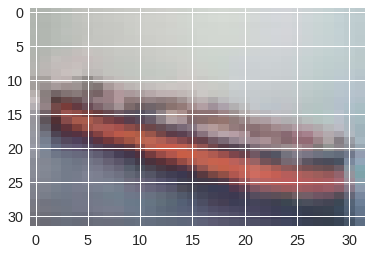

In [85]:
img_idx = 999
plt.imshow(X_test[img_idx],aspect='auto')

### Test image label

In [86]:
print(np.argmax(y_test[img_idx]))

8


### Predict the label

In [87]:
test_image = np.expand_dims(X_test[img_idx],axis=0)
test_image.shape

(1, 32, 32, 3)

In [88]:
model.predict_classes(test_image,batch_size=1)

array([8])

In [89]:
model.predict_proba(test_image,batch_size=1)

array([[8.1526823e-03, 7.0405918e-06, 4.6335114e-03, 4.1290688e-05,
        1.1985277e-06, 2.0682708e-06, 4.1457235e-05, 4.6037986e-08,
        9.8711932e-01, 1.4670251e-06]], dtype=float32)

# Utility Methods to understand CNN
- source: https://github.com/fchollet/keras/issues/431
- source: https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py

In [0]:
# https://github.com/fchollet/keras/issues/431
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [0]:
# https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py
def display_activations(activation_maps):
    import numpy as np
    import matplotlib.pyplot as plt
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        #plt.imshow(activations, interpolation='None', cmap='binary')
        fig, ax = plt.subplots(figsize=(18, 12))
        ax.imshow(activations, interpolation='None', cmap='binary')
        plt.show()

In [93]:
activations = get_activations(model, test_image)

----- activations -----
(1, 28, 28, 32)
(1, 26, 26, 64)
(1, 13, 13, 64)
(1, 13, 13, 64)
(1, 11, 11, 128)
(1, 5, 5, 128)
(1, 5, 5, 128)
(1, 3, 3, 256)
(1, 1, 1, 512)
(1, 1, 1, 512)
(1, 512)
(1, 1024)
(1, 1024)
(1, 10)


Displaying activation map 0


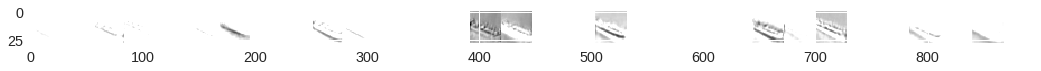

Displaying activation map 1


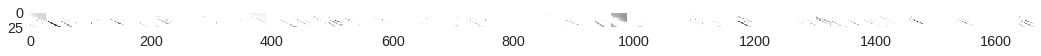

Displaying activation map 2


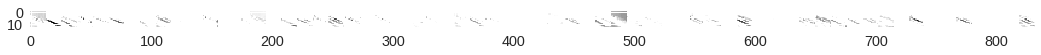

Displaying activation map 3


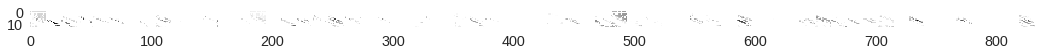

Displaying activation map 4


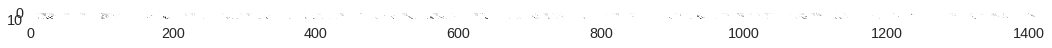

Displaying activation map 5


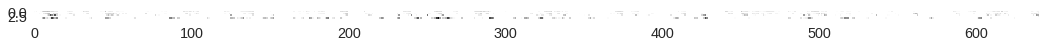

Displaying activation map 6


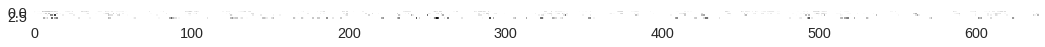

Displaying activation map 7


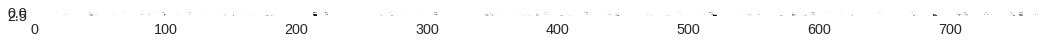

Displaying activation map 8


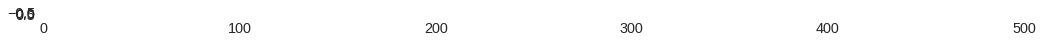

Displaying activation map 9


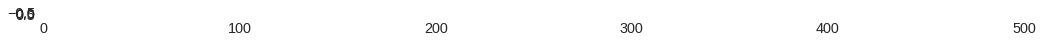

Displaying activation map 10


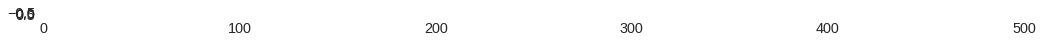

Displaying activation map 11


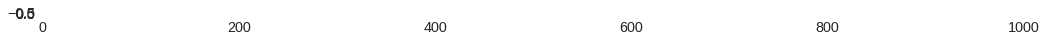

Displaying activation map 12


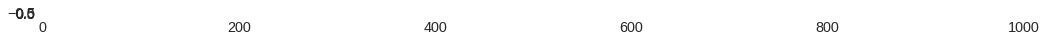

Displaying activation map 13


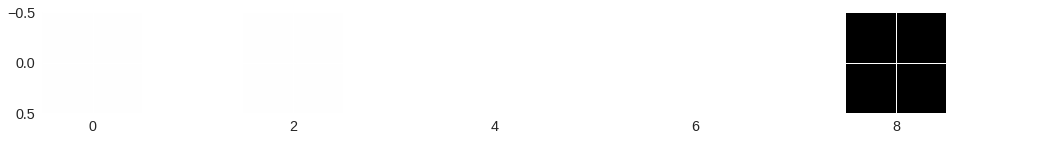

In [94]:
display_activations(activations)